**BDP PySpark ML**

**ID: 202318002**

**Name: Bhavik Manwani**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

# from os import environ
# environ["PYARROW_IGNORE_TIMEZONE"]="1"
# import pyspark.pandas as ps

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# creating spark session using app name and local master

spark = SparkSession.builder.appName("NewsPopularity").master("local").getOrCreate()
spark

In [ ]:
df = spark.read.csv('OnlineNewsPopularity.csv', header=True, inferSchema=True)
df.toPandas().head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593.0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711.0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500.0
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200.0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505.0


In [ ]:
df.printSchema()

root
 |-- url: string (nullable = true)
 |--  timedelta: double (nullable = true)
 |--  n_tokens_title: double (nullable = true)
 |--  n_tokens_content: double (nullable = true)
 |--  n_unique_tokens: double (nullable = true)
 |--  n_non_stop_words: double (nullable = true)
 |--  n_non_stop_unique_tokens: double (nullable = true)
 |--  num_hrefs: double (nullable = true)
 |--  num_self_hrefs: double (nullable = true)
 |--  num_imgs: double (nullable = true)
 |--  num_videos: double (nullable = true)
 |--  average_token_length: double (nullable = true)
 |--  num_keywords: double (nullable = true)
 |--  data_channel_is_lifestyle: double (nullable = true)
 |--  data_channel_is_entertainment: double (nullable = true)
 |--  data_channel_is_bus: double (nullable = true)
 |--  data_channel_is_socmed: double (nullable = true)
 |--  data_channel_is_tech: double (nullable = true)
 |--  data_channel_is_world: double (nullable = true)
 |--  kw_min_min: double (nullable = true)
 |--  kw_max_min: do

In [ ]:

print('\nTotal rows: ', df.count())
print('\nTotal null values: ', df.count() - df.dropna().count())

df = df.dropna()

print('\nTotal rows after removing null values: ', df.count())

# Drop irrelevant features such as URL data
df = df.drop("url")

print('\nAfter removing \'url\': ')
df.toPandas().head()


Total rows:  39644

Total null values:  0

Total rows after removing null values:  39644

After removing 'url': 


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593.0
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711.0
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500.0
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200.0
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505.0


In [ ]:
from pyspark.sql.functions import when, median

print('Columns: ', df.columns[0:3])

# removing whitespaces in column names
for i in range(len(df.columns)):
    df = df.withColumnRenamed(df.columns[i], df.columns[i].strip())

print('Renamed Columns: ', df.columns[0:3])


m = df.select(median(df['shares'])).collect()[0][0]
print('\nMedian Value of Shares: ', m)

# adding column after comparing shares' median values
df = df.withColumn('popularity', when(df['shares'] < m, 'not popular').otherwise('popular'))
df = df.withColumn('popular', when(df['shares'] < m, 0).otherwise(1))

df[['shares', 'popularity']].toPandas().head()


Columns:  ['timedelta', 'n_tokens_title', 'n_tokens_content']
Renamed Columns:  ['timedelta', 'n_tokens_title', 'n_tokens_content']

Median Value of Shares:  1400.0


,shares,popularity
0,593.0,not popular
1,711.0,not popular
2,1500.0,popular
3,1200.0,not popular
4,505.0,not popular


In [ ]:
# summary statistics

df.describe().toPandas()

,summary,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popularity,popular
0,count,39644,39644,39644,39644,39644,39644,39644,39644,39644,...,39644,39644,39644,39644,39644,39644,39644,39644,39644,39644
1,mean,354.53047119362327,10.398748864897588,546.514731106851,0.5482157168486088,0.9964685654578603,0.6891753940079369,10.883689839572192,3.2936383815962063,4.544142871556856,...,-0.25952414109091587,-0.5219437277484072,-0.10750024015635165,0.2823531841135558,0.0714254319759339,0.34184275596034974,0.15606366285653878,3395.3801836343455,None,0.5335990313792756
2,stddev,214.1637671697689,2.1140368083035197,471.10750794805506,3.520708331241112,5.231230945149074,3.2648163548136098,11.332017376010876,3.855141145374438,8.309433519603706,...,0.12772572202940616,0.2902895022093856,0.0953729848325383,0.3242473752893324,0.26545022913420496,0.18879080475299492,0.22629419772607945,11626.950748651732,None,0.49887611979070606
3,min,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,0.0,-1.0,0.0,0.0,1.0,not popular,0
4,max,731.0,23.0,8474.0,701.0,1042.0,650.0,304.0,116.0,128.0,...,0.0,0.0,0.0,1.0,1.0,0.5,1.0,843300.0,popular,1


In [ ]:

# filtering column with condition
non_popular_shares = df.filter(df.popularity == "not popular")
non_popular_shares.toPandas().head()


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popularity,popular
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593.0,not popular,0
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711.0,not popular,0
2,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200.0,not popular,0
3,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505.0,not popular,0
4,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,0.0,...,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855.0,not popular,0


In [ ]:
popular_shares = df.filter(df.popularity == "popular")
popular_shares.toPandas().head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popularity,popular
0,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,-0.466667,-0.800,-0.133333,0.000,0.0,0.500,0.0,1500.0,popular,1
1,731.0,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,0.0,...,-0.125000,-0.125,-0.125000,0.125,0.0,0.375,0.0,3600.0,popular,1
2,731.0,9.0,1248.0,0.490050,1.0,0.731638,11.0,0.0,1.0,0.0,...,-0.415064,-1.000,-0.100000,0.000,0.0,0.500,0.0,2200.0,popular,1
3,731.0,10.0,187.0,0.666667,1.0,0.800000,7.0,0.0,1.0,0.0,...,-0.262500,-0.400,-0.125000,0.000,0.0,0.500,0.0,1900.0,popular,1
4,731.0,9.0,285.0,0.744186,1.0,0.841530,4.0,2.0,0.0,21.0,...,-0.337889,-0.700,-0.100000,1.000,-1.0,0.500,1.0,10000.0,popular,1


In [ ]:
# value counts based on popularity
df.groupBy("popularity").count().toPandas()

,popularity,count
0,popular,21154
1,not popular,18490


In [ ]:
non_popular_shares.describe().toPandas()

,summary,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popularity,popular
0,count,18490,18490,18490,18490,18490,18490,18490,18490,18490,...,18490,18490,18490,18490,18490,18490,18490,18490,18490,18490
1,mean,344.64699837750135,10.498269334775554,525.636884802596,0.5375337206702523,0.9734451005622565,0.6818708648130811,9.790048674959438,3.126554894537588,3.9469442942130883,...,-0.2593518689703461,-0.521801155097549,-0.10753073139229186,0.2711115835376841,0.05624283700346488,0.34120334923999296,0.14623498759369938,909.4892374256355,None,0.0
2,stddev,213.56053006854978,2.0989947167277268,424.43431716911556,0.13208643833245964,0.16078286590166693,0.14819402222617634,9.751071698129286,3.4633510124012923,7.8242808682065235,...,0.12685929670221502,0.28974644334361604,0.09490234196506601,0.31632189686517226,0.25372557479244423,0.18980585071064535,0.21483544142922556,253.90804918210722,None,0.0
3,min,8.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,0.0,-1.0,0.0,0.0,1.0,not popular,0
4,max,731.0,20.0,7764.0,0.999999962963,0.999999999757,0.999999985507,162.0,54.0,100.0,...,0.0,0.0,0.0,1.0,1.0,0.5,1.0,1300.0,not popular,0


In [ ]:
popular_shares.describe().toPandas()

,summary,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popularity,popular
0,count,21154,21154,21154,21154,21154,21154,21154,21154,21154,...,21154,21154,21154,21154,21154,21154,21154,21154,21154,21154
1,mean,363.1692824052189,10.311761369008225,564.7633544483313,0.5575524904771392,1.0165926018537879,0.6955600373289417,11.839604802874161,3.4396804386877187,5.066134064479531,...,-0.2596747183580698,-0.5220683457078655,-0.1074735887923882,0.292179089126703,0.08469602765717461,0.3424016398716244,0.16465457736962819,5568.213860262835,None,1.0
2,stddev,214.3217061600898,2.1233299172910636,507.71304490726294,4.818179521790676,7.159814924074906,4.46731230599594,12.473768209847684,4.162125538841441,8.67797559124839,...,0.12848105687530828,0.29077013090086695,0.09578469784649352,0.3307140141856069,0.27460897564936565,0.18790180381988594,0.23552374447509258,15594.025442855875,None,0.0
3,min,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,0.0,-1.0,0.0,0.0,1400.0,popular,1
4,max,731.0,23.0,8474.0,701.0,1042.0,650.0,304.0,116.0,128.0,...,0.0,0.0,0.0,1.0,1.0,0.5,1.0,843300.0,popular,1


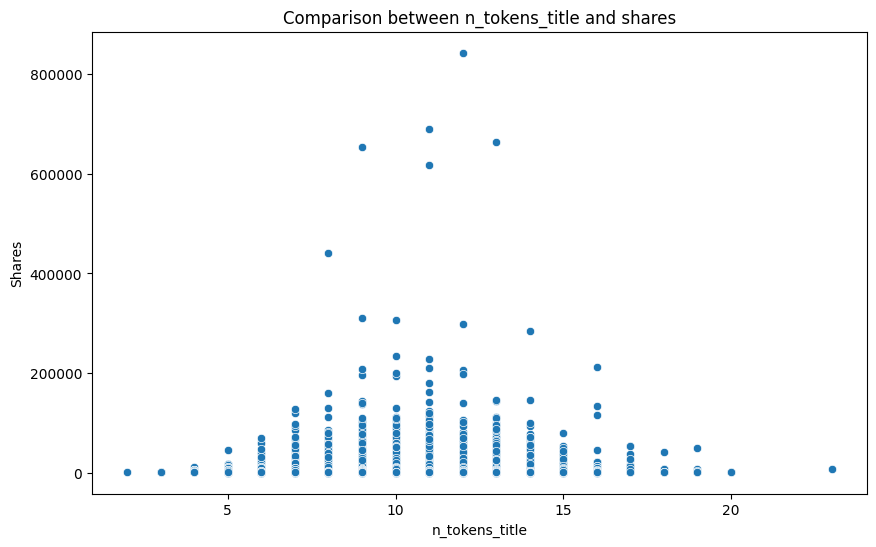

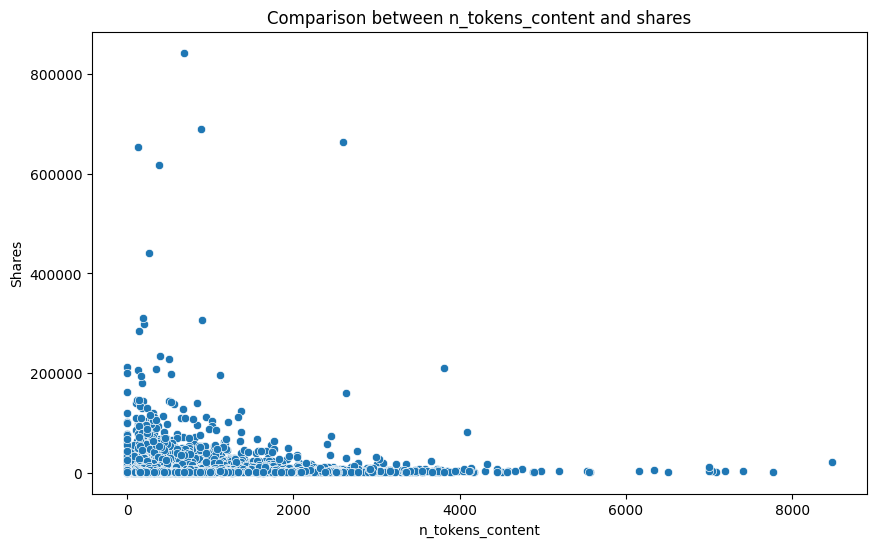

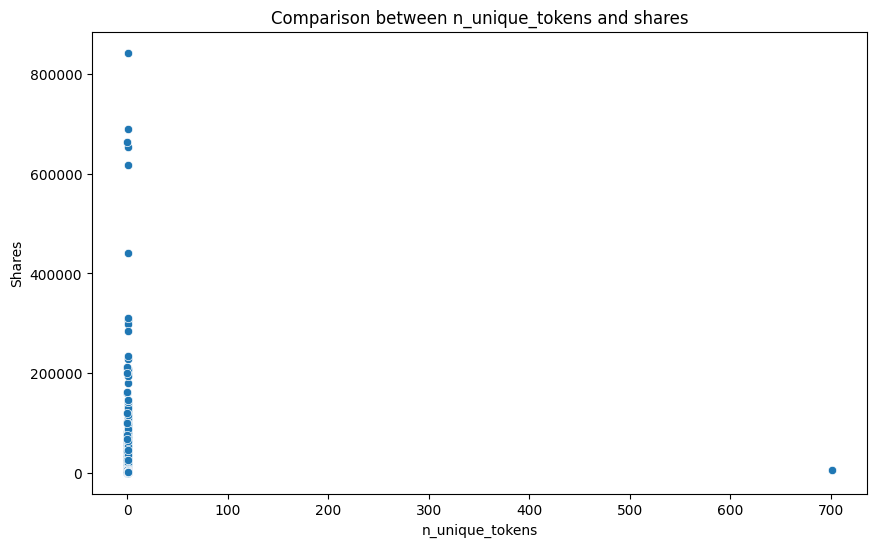

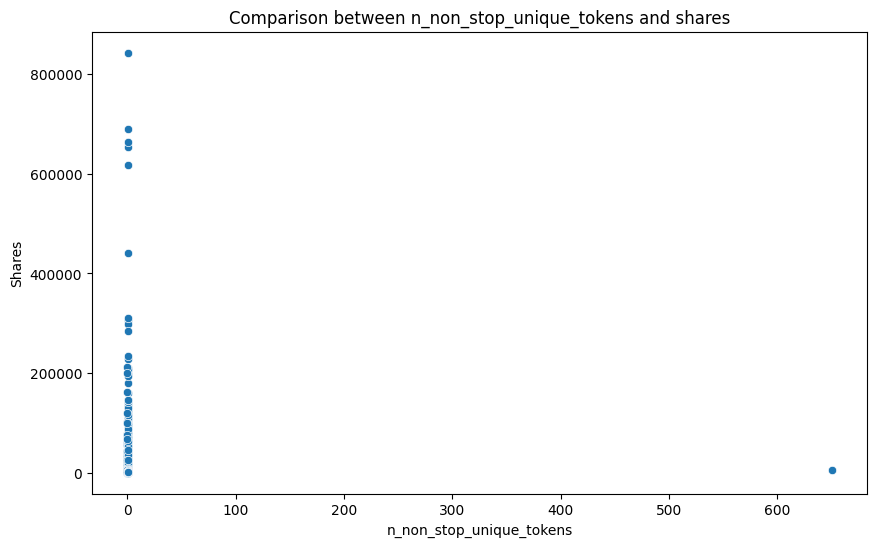

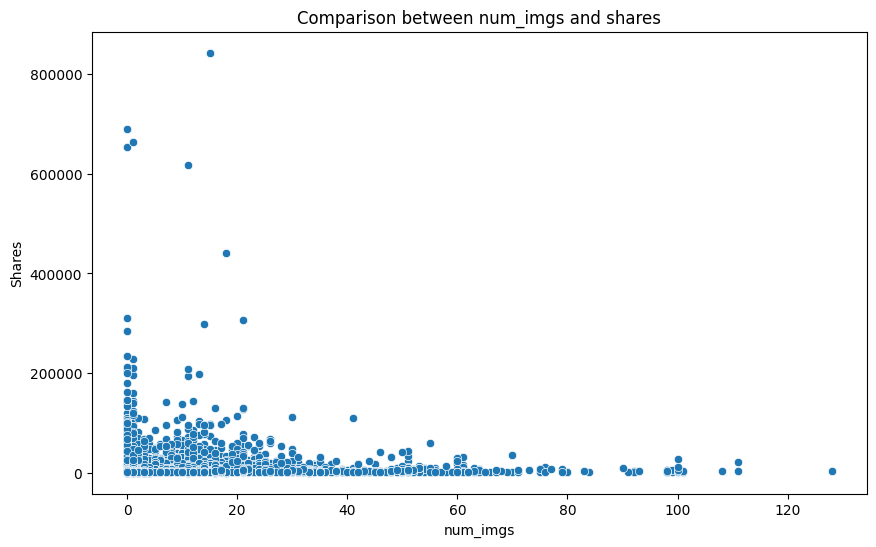

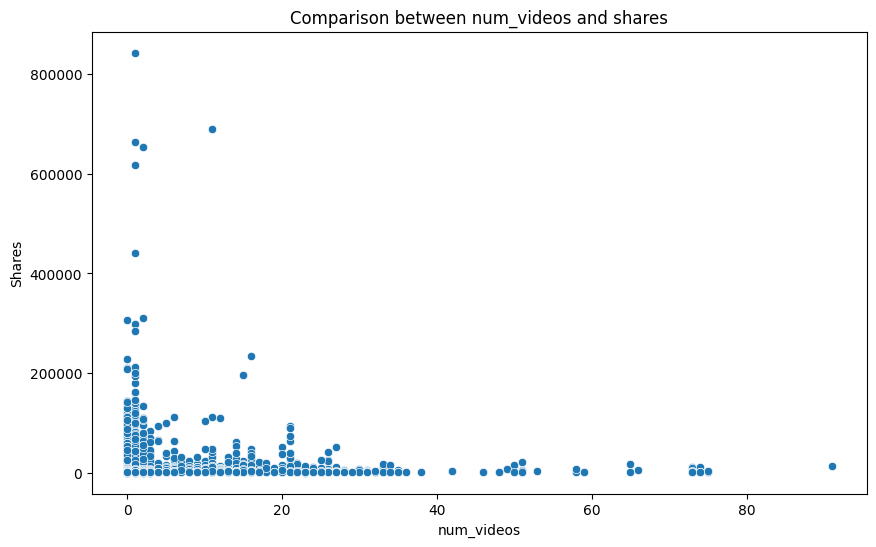

In [ ]:
cols = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_unique_tokens','num_imgs', 'num_videos']

for col in cols:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df.toPandas(), x=col, y="shares")
    plt.title(f"Comparison between {col} and shares")
    plt.xlabel(col)
    plt.ylabel("Shares")
    plt.show()

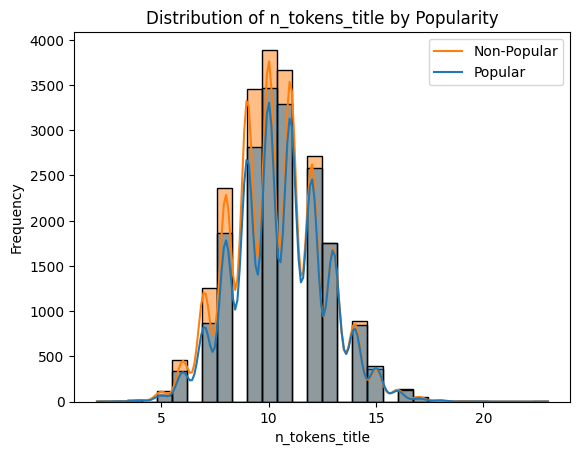

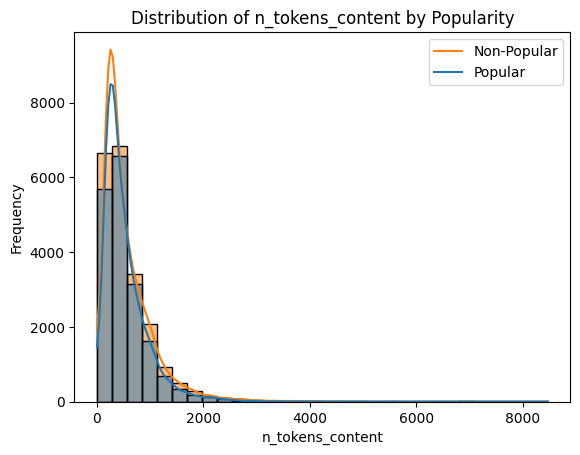

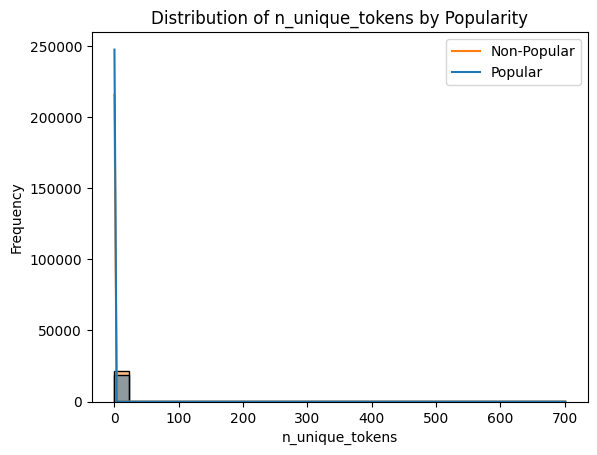

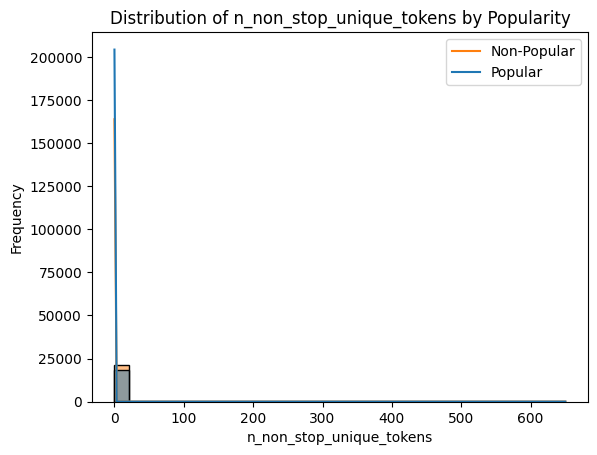

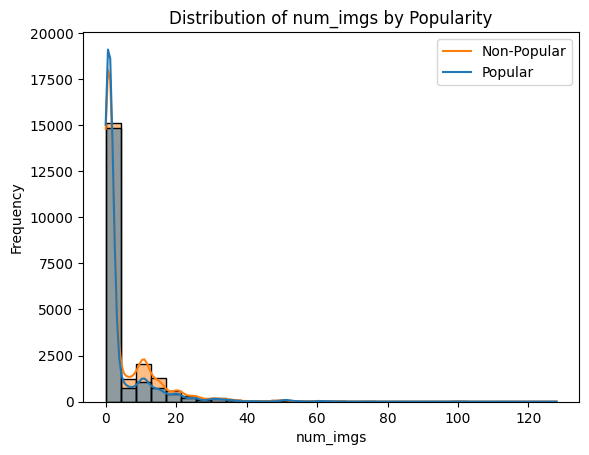

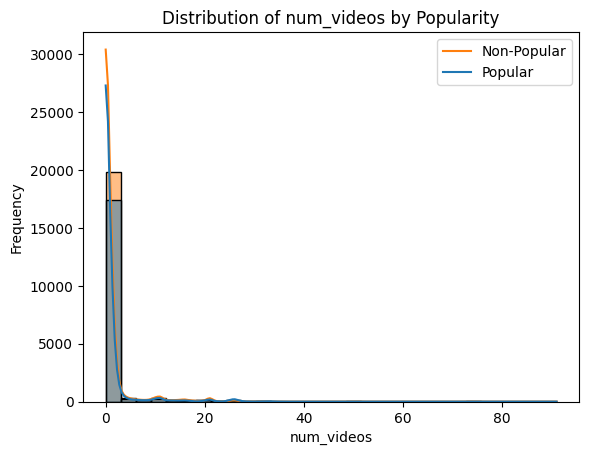

In [ ]:
for col in cols:
    sns.histplot(data=df.toPandas(), x=col, hue="popularity", kde=True, bins=30, alpha=0.5)
    plt.title(f"Distribution of {col} by Popularity")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend(["Non-Popular", "Popular"])
    plt.show()


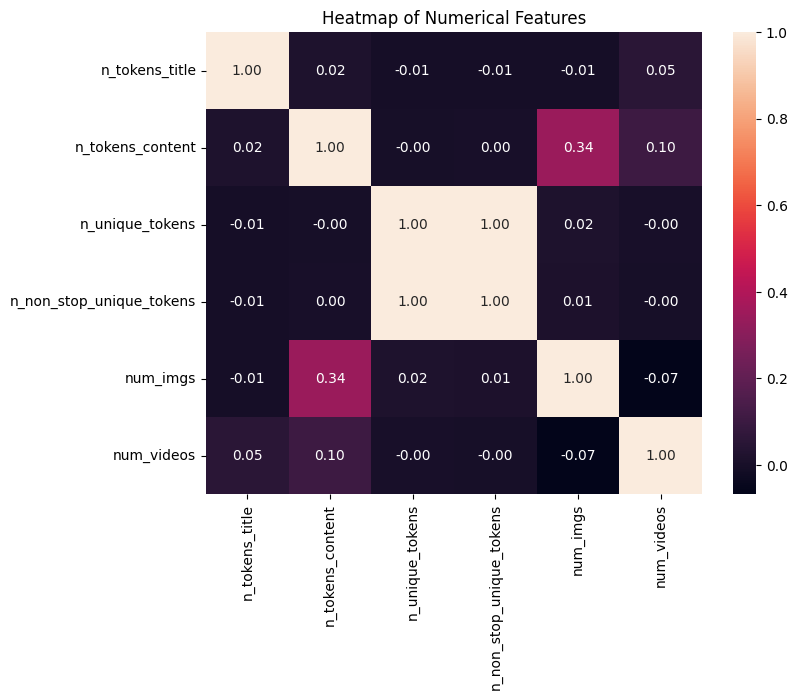

In [ ]:
# numeric_data = data.select(numeric_features)
correlation_matrix = df.select(cols).toPandas().corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Heatmap of Numerical Features")
plt.show()

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.pipeline import Pipeline

from pyspark.ml.feature import Bucketizer

bucketizer = Bucketizer(splits=[0, 500, 1000, float('inf')], inputCol="num_videos", outputCol="new")
df = bucketizer.transform(df)



In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
import matplotlib.pyplot as plt
import numpy as np

# Define the feature vector
cols = [col for col in df.columns if col not in ["shares", "popularity"]]
assembler = VectorAssembler(inputCols=cols, outputCol="new_col")

# Split dataset into training and testing sets
train, test = df.randomSplit([0.8, 0.2], seed=42)

# Train a Random Forest classifier
rf = RandomForestClassifier(featuresCol="new_col", labelCol="popular")
pipeline = Pipeline(stages=[assembler, rf])
model = pipeline.fit(train)

# Make predictions on the test set
predictions = model.transform(test)


In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol="popular", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy Score: ", accuracy)

# Analyze the confusion matrix
conf_matrix = predictions.groupBy("popularity", "prediction").count()
conf_matrix.toPandas().head()

Accuracy Score:  1.0


,popularity,prediction,count
0,not popular,0.0,3682
1,popular,1.0,4238


In [ ]:
spark.stop()